In [29]:
import numpy
from matplotlib import pyplot
from scipy import linalg
%matplotlib inline

In [30]:
L=1.0
nx=51
dx=L/(nx-1)
x=numpy.linspace(0.0,L,num=nx)

alpha=1.22e-3
T0=numpy.zeros(nx)
T0[0]=100.0

In [51]:
def solve_1d(T0, nt, dt, dx, alpha, cI, cE, bc):
    T=T0.copy()
    #for an implicit scheme only solving for the points inside of the domain
    N=len(T0)-2
    A , b_bc=lhs_operator(N, dt, dx, alpha, cI, bc)
    for n in range (nt):
        b=rhs_vector(T, dt, dx, alpha, cE)
        T[1:-1]=linalg.solve(A,b-b_bc)
        update_boundaries(T, dx, bc)
    return T

In [52]:
def lhs_operator(N, dt, dx, alpha, cI, bc):
    
    I=numpy.identity(N)
    L , b_bc=laplacian_1d(N, dx, bc)
    A=I/dt - cI*alpha*L
    
    return A , b_bc

In [53]:
def rhs_vector(T, dt, dx, alpha, cE):
    
    b=T[1:-1]/dt + cE*alpha*(T[:-2]-2*T[1:-1]+T[2:])/dx**2
    
    return b

In [54]:
def update_boundaries(T, dx, bc):
    
    T[0]=get_boundary_value(T[1],dx,bc['left'])
    T[-1]=get_boundary_value(T[-2], dx, bc['right'])
    
    return

In [55]:
def get_boundary_value(T_neighbor, dx, bc):
    
    if bc['type']=='Dirichlet':
        return bc['value']
    elif bc['type']=='Neumann':
        return T_neighbor+bc['value']*dx
    else:
        raise ValueError('only dirichlet and Nuemann are supported')
    
    return 

In [56]:
def laplacian_1d(N, dx, bc):
    
    D=numpy.diag(-2.0/dx**2 * numpy.ones(N))
    L=numpy.diag(1.0/dx**2 * numpy.ones(N-1), k=-1) #lower diagonal
    U=numpy.diag(1.0/dx**2 * numpy.ones(N-1), k=+1) #upper diagonal
    A=D+U+L
    b_bc=numpy.zeros(N)
    
    #left boundary:
    if bc['left']['type'] == 'Dirichlet':
        b_bc[0]=bc['left']['value']/dx**2
        
    elif bc['left']['type']== 'Neumann':
        A[0,0]=-1.0/dx**2
        b_bc[0]=bc['left']['value']/dx
        
    #right boundary
    if bc['right']['type'] == 'Dirichlet':
        b_bc[-1]=bc['right']['value']/dx**2
        
    elif bc['right']['type']== 'Neumann':
        A[-1,-1]=-1.0/dx**2
        b_bc[-1]=bc['right']['value']/dx
    
    return A , b_bc

In [57]:
#creating a dictionary
bc_left={'type':'Dirichlet','value':100.0}
bc_right={'type':'Neumann','value':0.0}
# print(bc_left['type'])
# print(bc_left['value'])
bc={'left':bc_left, 'right':bc_right}
print(bc['left']['type'])

Dirichlet


In [58]:
#an example not being used
def func(a):
    a[0]+=2.0
    return

a=numpy.ones(3)
print(a)
func(a)
print(a)

[1. 1. 1.]
[3. 1. 1.]


In [59]:
Tb1=get_boundary_value(100.0, 1.0, {'type':'Dirichlet', 'value': 101.0})
print(Tb1)
Tb=get_boundary_value(100.0, 1.0, {'type':'Neumann', 'value': 0.0})
print(Tb)

101.0
100.0


In [60]:
sigma=0.5
dt=sigma*dx**2 / alpha
nt=100

T=solve_1d(T0,nt,dt,dx,alpha,0.5, 0.5, bc)

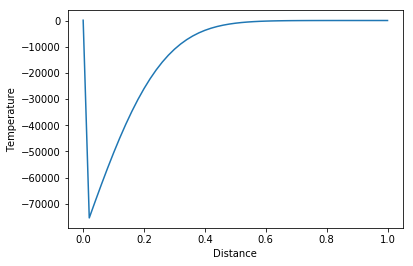

In [61]:
pyplot.figure()
pyplot.xlabel('Distance')
pyplot.ylabel('Temperature')
pyplot.plot(x,T)

There is an error in the code somewhere.

Below is the code from the lesson that will work

For Crank-Nicolson when you use too many iterations the errors start to accumulate and its not 2nd order accurate anymore. The issue is with the Nuemann condition as it's 1st order, so you're putting 1st order error into a 2nd order system, which will change the slope of the curve to 1st order if you do a lot of iterations.